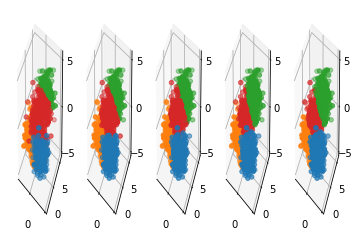

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
def randrange(mu,sig,num=300):
    #return (maxv-minv)*np.random.rand(n) + minv
    return np.random.normal(mu,sig,num)

k_centroids=4

l1= np.array([randrange(0,1),randrange(0,1),randrange(0,1)]).T
l2= np.array([randrange(2,1),randrange(2,1),randrange(2,1)]).T
l3= np.array([randrange(-1,1),randrange(-1,1),randrange(-2,1)]).T
l4= np.array([randrange(2,1),randrange(-2,1),randrange(-2,1)]).T
data = np.concatenate([l1,l2,l3,l4])

sess = tf.InteractiveSession()

points = tf.constant(data)

centroids = tf.Variable(tf.random_shuffle(points)[:k_centroids, :])

points_e = tf.expand_dims(points, axis=0) 
centroids_e = tf.expand_dims(centroids, axis=1) 
distances = tf.reduce_sum((points_e - centroids_e) ** 2, axis=-1)

indices = tf.argmin(distances, axis=0)

clusters = [tf.gather(points, tf.where(tf.equal(indices, i))) for i in range(k_centroids)]

new_centroids = tf.concat([tf.reduce_mean(clusters[i], reduction_indices=[0]) for i in range(k_centroids)], axis=0)

assign = tf.assign(centroids, new_centroids)

sess.run(tf.global_variables_initializer())

fig = plt.figure()
for j in range(5):
    clusters_val, centroids_val, _ = sess.run([clusters, centroids, assign])

    ax = plt.subplot(151+j,projection='3d')

    for i in range(k_centroids):
        ax.scatter(clusters_val[i][:, 0, 0], clusters_val[i][:, 0, 1],clusters_val[i][:,0,2])

plt.show()

